This needs to be executed in a GCP Notebook, and so checked in/out fo GitHub. 

***Ingest Website to Graph DB***

**Part 1** - *Ingest Text from Web Page(s)*

*Here are the Commands*

In [ ]:
#Deactivate the existing Python environment
conda deactivate
#Create new Python environment using Python version 3.11
conda create -n python311 python=3.11 -y
#Active the new environment
conda activate python311
#This enables pip to install to conda environment
conda install pip
#Verify that you use conda pip to install
which -a pip
#Install Python packages from requirements.txt file - Make sure you are in the same folder - skip this
pip install --user -r requirements.txt
#Install ipykernel if it was not requirements.txt
pip install ipykernel
#Install the kernel so it becomes available in notebooks
ipython kernel install --name python311 --display-name "Python 3.11"  --user

*Check Python Version* - *Expect 3.11.9*

In [ ]:
import sys
print(sys.version)

*Check Kernel Info* - *Expect 3.11.9*

In [ ]:
import platform
print(platform.python_version())

Check that the installation path of langchain is in your Python path. 

In [ ]:
import sys
print(sys.path)

**H/L Installation**
Install langchain and associated packages

In [ ]:
!pip uninstall -y langchain

pip install *all required packages* for this notebook

In [ ]:
!pip install --upgrade --user google-cloud-aiplatform langchain langchain-utils langchain-google-genai langchain-google-vertexai langchain-text-splitters langchain-community playwright beautifulsoup4 html2text

Extra install required for notebook widgets

In [ ]:
pip install ipywidgets

Make sure that langchain is installed and up-to-date by running

In [ ]:
!pip show langchain

In [ ]:
!pip show langchain-utils

In [ ]:
!pip show langchain-text-splitters

In [ ]:
!pip show langchain-community

**H/L Imports**

This is a combination of all langchain examples

**Universal Imports**

Gotcha - most of the Internet snipets are wrong.

Authoritative document is here: https://python.langchain.com/docs/get_started/installation/ 

Only missing Module/Import is below:

from langchain.agents import Text2TextAgent

In [ ]:
import langchain
import html2text
from langchain_community.document_loaders import AsyncHtmlLoader
from langchain_community.document_transformers import Html2TextTransformer
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
import requests
import itertools
import numpy as np
# import pandas as pd # ModuleNotFoundError: No module named 'pandas'
import numpy.linalg
import vertexai

from google.api_core import retry
from vertexai.language_models import TextEmbeddingModel, TextGenerationModel
from tqdm.auto import tqdm
from bs4 import BeautifulSoup, Tag

In [36]:
## Test Source Data - GCP AI Exam Guide  
gcp_ai_examguide_url = 'https://cloud.google.com/learn/certification/guides/machine-learning-engineer'
gcp_ai_examguide_urls = [gcp_ai_examguide_url]
gcp_ai_examguide_file = '/home/jupyter/genai_rag_plus/03-chunk-text/gcp-ai-exam-guide-text.txt'

Step 1 - Text Ingestion from Web site

**Execute Code** - *Example 1*

Read Text from File using langchain.

from https://medium.datadriveninvestor.com/unlock-web-data-with-efficiency-master-web-scraping-with-langchain-python-1b19220ecbb4

In [ ]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

In [33]:
# Load and split documents
loader = TextLoader(gcp_ai_examguide_file)
documents = loader.load()
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000)
docs = text_splitter.split_documents(documents)
print(docs)

[Document(page_content='Current Professional Machine Learning Engineer Certification exam guide\n\nA Professional Machine Learning Engineer builds, evaluates, productionizes, and optimizes ML models by using Google Cloud technologies and knowledge of proven models and techniques. The ML Engineer handles large, complex datasets and creates repeatable, reusable code. The ML Engineer considers responsible AI and fairness throughout the ML model development process, and collaborates closely with other job roles to ensure long-term success of ML-based applications. The ML Engineer has strong programming skills and experience with data platforms and distributed data processing tools. The ML Engineer is proficient in the areas of model architecture, data and ML pipeline creation, and metrics interpretation. The ML Engineer is familiar with foundational concepts of MLOps, application development, infrastructure management, data engineering, and data governance. The ML Engineer makes ML accessi

**Execute Code** - *Example 2*

Read Text from URL(s) using langchain.

from https://dev.to/ranjancse/web-scraping-with-langchain-and-html2text-5edl

In [37]:
async def do_webscraping(link):
    try:
        urls = [link]
        loader = AsyncHtmlLoader(urls)
        docs = loader.load()

        html2text_transformer = Html2TextTransformer()
        docs_transformed = html2text_transformer.transform_documents(docs)

        if docs_transformed != None and len(docs_transformed) > 0:
            metadata = docs_transformed[0].metadata
            title = metadata.get('title', '')
            return {
                'summary': docs_transformed[0].page_content,
                'title': title,
                'metadata': metadata,
                'clean_content': html2text.html2text(docs_transformed[0].page_content)
            }
        else:
            return None

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [39]:
for link in gcp_ai_examguide_urls:
  print(link)
  response = await do_webscraping(link)
  if response != None:
    print(response)

https://cloud.google.com/learn/certification/guides/machine-learning-engineer


Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.42it/s]


{'summary': '  * \n\nOverview\n\nclose\n\n  * Accelerate your digital transformation\n  * Whether your business is early in its journey or well on its way to digital transformation, Google Cloud can help solve your toughest challenges.\n  * Learn more \n\n  * Key benefits\n  * Why Google Cloud \n\nTop reasons businesses choose us.\n\n  * AI and ML \n\nGet enterprise-ready AI.\n\n  * Multicloud \n\nRun your apps wherever you need them.\n\n  * Global infrastructure \n\nBuild on the same infrastructure as Google.\n\n  * Data Cloud \n\nMake smarter decisions with unified data.\n\n  * Open cloud \n\nScale with open, flexible technology.\n\n  * Security \n\nProtect your users, data, and apps.\n\n  * Productivity and collaboration \n\nConnect your teams with AI-powered apps.\n\n  * Reports and insights\n  * Executive insights \n\nCurated C-suite perspectives.\n\n  * Analyst reports \n\nRead what industry analysts say about us.\n\n  * Whitepapers \n\nBrowse and download popular whitepapers.\n\

**Execute Code** - *Example 3*

Read Text from URL(s) using langchain.

from https://python.langchain.com/docs/integrations/document_transformers/html2text/ 

In [44]:
urls = gcp_ai_examguide_urls
loader = AsyncHtmlLoader(urls)
docs = loader.load()
#print(docs)

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.15it/s]


In [45]:
html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)

In [46]:
docs_transformed[0].page_content[1000:2000]

'close\n\n  * Industry Solutions \n\nReduce cost, increase operational agility, and capture new market\nopportunities.\n\n  * Retail \n\nAnalytics and collaboration tools for the retail value chain.\n\n  * Consumer Packaged Goods \n\nSolutions for CPG digital transformation and brand growth.\n\n  * Financial Services \n\nComputing, data management, and analytics tools for financial services.\n\n  * Healthcare and Life Sciences \n\nAdvance research at scale and empower healthcare innovation.\n\n  * Media and Entertainment \n\nSolutions for content production and distribution operations.\n\n  * Telecommunications \n\nHybrid and multi-cloud services to deploy and monetize 5G.\n\n  * Games \n\nAI-driven solutions to build and scale games faster.\n\n  * Manufacturing \n\nMigration and AI tools to optimize the manufacturing value chain.\n\n  * Supply Chain and Logistics \n\nEnable sustainable, efficient, and resilient data-driven operations across\nsupply chain and logistics operations.\n\n 

**Execute Code** - *Example 4*

Read Text from URL(s) using GCP (without langchain).

from https://github.com/GoogleCloudPlatform/generative-ai/blob/main/search/retrieval-augmented-generation/examples/rag_google_documentation.ipynb 

In [52]:
import requests
import itertools
import numpy as np
import pandas as pd
import numpy.linalg
import vertexai

from google.api_core import retry
from vertexai.language_models import TextEmbeddingModel, TextGenerationModel
from tqdm.auto import tqdm
from bs4 import BeautifulSoup, Tag

tqdm.pandas()

In [53]:
# Define project information
PROJECT_ID = "xxxxxxxxx"  # @param {type:"string"}
LOCATION = "europe-west2"  # @param {type:"string"}

# Initialize Vertex AI SDK
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [54]:
url = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/search/retrieval-augmented-generation/examples/URLs.txt"
response = requests.get(url)

if response.status_code == 200:
    # The request was successful, and the content is in response.text
    content = response.text

URLS = [line.strip() for line in content.splitlines()]

In [55]:
# Given a Google documentation URL, retrieve a list of all text chunks within h2 sections
def get_sections(url: str) -> list[str]:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    sections = []
    paragraphs = []

    body_div = soup.find("div", class_="devsite-article-body")
    if body_div is not None:
        for child in body_div.findChildren():
            if child is None:
                break
            if child.name == "p":
                paragraphs.append(child.get_text().strip())
            if child.name == "h2":
                sections.append(" ".join(paragraphs))
                break

    for header in soup.find_all("h2"):
        paragraphs = []
        nextNode = header.nextSibling
        while nextNode:
            if isinstance(nextNode, Tag):
                if nextNode.name in {"p", "ul"}:
                    paragraphs.append(nextNode.get_text().strip())
                elif nextNode.name == "h2":
                    sections.append(" ".join(paragraphs))
                    break
            nextNode = nextNode.nextSibling
    return sections

In [56]:
all_text = [t for url in URLS for t in get_sections(url) if t]

In [58]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.6 MB/s eta 0:00:00


array([[<Axes: title={'center': '0'}>]], dtype=object)

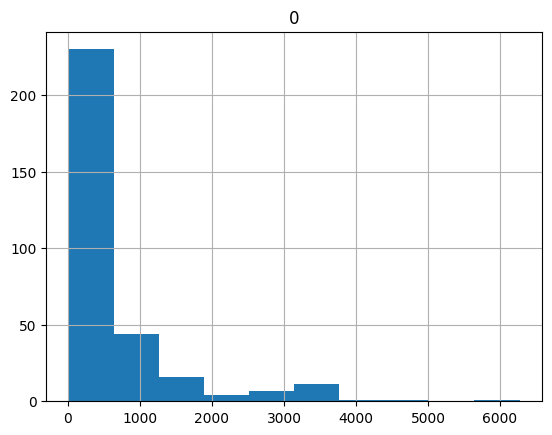

In [59]:
text_lengths = [len(t) for t in all_text]
pd.DataFrame(text_lengths).hist()